In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

In [2]:
import matplotlib.pyplot as plt
import seaborn as seabornInstance 

In [4]:
prices=pd.read_csv("/Users/Sarah/Desktop/CMC/Academics/Spring2020/MATH389/Midterm/nyse/prices.csv")

In [5]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [15]:
df = pd.read_csv("/Users/Sarah/Desktop/CMC/Academics/Spring2020/MATH389/Midterm/nyse/prices.csv") #loading the csv file
df=df[df.symbol=='RHT']#choosing stock symbol

In [16]:
df

,date,symbol,open,close,low,high,volume
611,2010-01-04,RHT,31.230000,31.120001,31.030001,31.500000,2060800.0
1079,2010-01-05,RHT,31.170000,30.969999,30.770000,31.350000,2116700.0
1547,2010-01-06,RHT,30.950001,30.969999,30.780001,31.420000,2164200.0
2015,2010-01-07,RHT,30.980000,30.389999,30.340000,31.000000,1900000.0
2483,2010-01-08,RHT,30.420000,30.139999,29.920000,30.420000,2764500.0
...,...,...,...,...,...,...,...
849150,2016-12-23,RHT,69.180000,71.010002,69.070000,71.180000,5646000.0
849650,2016-12-27,RHT,71.059998,70.190002,69.949997,71.449997,2707300.0
850150,2016-12-28,RHT,70.269997,70.019997,69.629997,70.559998,2282900.0
850650,2016-12-29,RHT,69.769997,69.650002,69.599998,70.480003,1773200.0


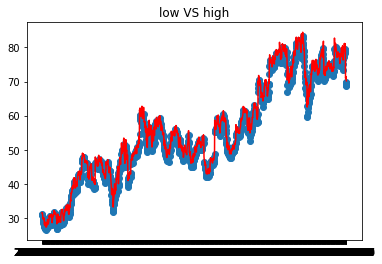

In [17]:
plt.title('low VS high')
plt.scatter(df.date, df.low)
plt.plot(df.date, df.high, color='red')
plt.show()

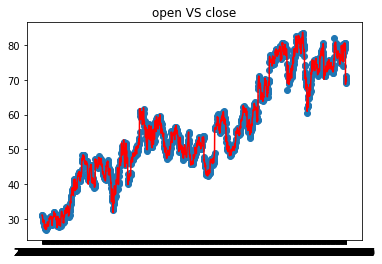

In [18]:
plt.title('open VS close')
plt.scatter(df.date, df.open)
plt.plot(df.date, df.close, color='red')
plt.show()

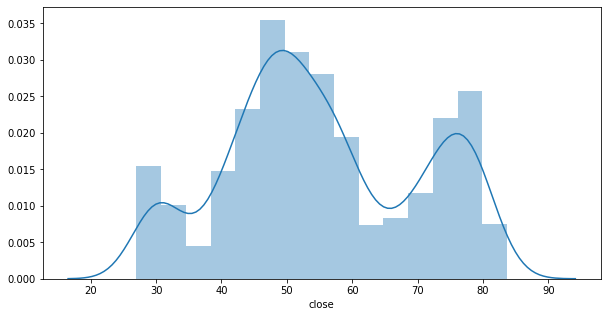

In [19]:
plt.figure(figsize=(10,5))
plt.tight_layout()
seabornInstance.distplot(df['close'])

In [37]:
def prepare_data(df,forecast,out,test_size):
    label = df[forecast].shift(-out);
    X = np.array(df[[forecast]]); 
    X = preprocessing.scale(X) 
    X_lately = X[-out:] 
    X = X[:-out] 
    label.dropna(inplace=True); 
    y = np.array(label)  
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size)  

    response = [X_train, X_test, Y_train, Y_test, X_lately];
    return response;

In [44]:
forecast = 'close'
out = 5 
test_size = 0.2; 
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast,out,test_size); 

learner = linear_model.LinearRegression(); 

learner.fit(X_train,Y_train); 
score=learner.score(X_test,Y_test);
y_hat = learner.predict(X_test)
score1=learner.score(X_test,Y_test)

forecasty= learner.predict(X_lately); 

response={};
response['test_score']=score; 
response['forecast_set']=forecasty;

print(response);

{'test_score': 0.9757649714053834, 'forecast_set': array([70.85351389, 70.04635183, 69.87900843, 69.51480608, 69.56401836])}


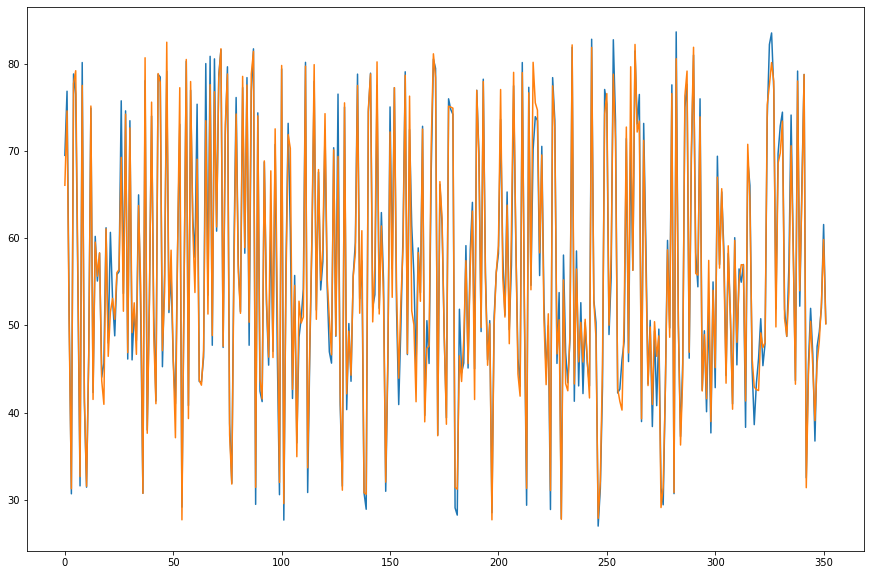

In [45]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(range(len(Y_test)), Y_test, label='y_test')
ax.plot(range(len(y_hat)), y_hat, label='y_pred')

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_hat)))

Mean Absolute Error: 1.6402388719923322
Mean Squared Error: 5.324197821003567
Root Mean Squared Error: 2.3074223326048413
